# 경사하강법이란?
- 손실을 줄이는 알고리즘
- 기울기가 최소가 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
- 손실함수를 최적화하는 방법중에 하나다. 

## 점진적인 학습 또는 온라인 학습

# 확률적 경사 하강법(SGD)

- 손실함수는 하나의 샘플에서 발생한 손실
- 비용함수는 훈련세트 전체에서 발생한 손실

# 확률적 경사 하강법을 활용한 분류 모델

## 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

In [4]:
%matplotlib inline
# 한글 폰트를 선명하게 표시
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 지정
mpl.rc('font', family = 'D2coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')

## 훈련데이터 로딩

In [5]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [12]:
# target 고유값 추출
fish['Species'].unique() # 다중분류

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
# Species를 제외한 나머지 특성은 입력 데이터 
# Species는 타깃 데이터 

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

## 특성 전처리와 훈련 세트, 테스트 세트 분리
- 훈련(fit)시키기 전까지는 스케일링을 해줘야한다. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state = 42)

#표준화 
ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

## 확률적 경사 하강법으로 모델 훈련

In [15]:
# SGDClassisier 클래스 : 확률적 강사 하강법을 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier

# loss function(손실함수), 손실 함수의 종류를 지칭하는 매개변수(loss)
# 이진분류회귀 : 이진크로스앤트로피
# 다중분류회귀 : 크로스엔트로피, 소프트맥스
# max_iter : 수행할 애포크(전체 훈련데이터 샘플을 사용하는 것) 횟수
sc = SGDClassifier(loss = 'log', max_iter=10, random_state = 42)
sc.fit(train_scaled, y_train)   
    
# 평가
print('훈련데이터 점수 :', sc.score(train_scaled, y_train))
print('테스트데이터 점수 :', sc.score(test_scaled, y_test))

훈련데이터 점수 : 0.773109243697479
테스트데이터 점수 : 0.775


In [18]:
# 모델을 이어서 훈련할 때 partical_fit()
sc.partial_fit(train_scaled, y_train)
print('훈련데이터 점수 :', sc.score(train_scaled, y_train))
print('테스트데이터 점수 :', sc.score(test_scaled, y_test)) # 너무 잦은 애포크를 하게 되면 과대적합이 발생할수 있다. 

훈련데이터 점수 : 0.8151260504201681
테스트데이터 점수 : 0.85


## 가장 적절한 에포크 횟수 찾기 
- 에포크 획수가 적어 모델이 훈련세트를 덜 학습하면 과소적합이 발생한다. 
- 너무 많은 에포크 횟수는 과대적합된 모델일 가능성이 높다. 

In [20]:
# partial_fit()를 사용하여 적절한 에포크 횟수 찾기

sc = SGDClassifier(loss='log', random_state = 42)

train_score = []
test_score = []

# partial_fit()만 사용하려면 훈련 세트의 전체 클래스(라벨)의 레이블을 전달해줘야 한다.
classes = np.unique(y_train)

# 300번의 에포크 동안 훈련을 반복하여 진행 
for _ in range(0, 300):
    sc.partial_fit(train_scaled, y_train, classes = classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

## 에포크 횟수에 따른 점수 시각화 작업

In [21]:
# 차트 스타일 지정
sns.set(font='D2coding', rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize = (10, 8))

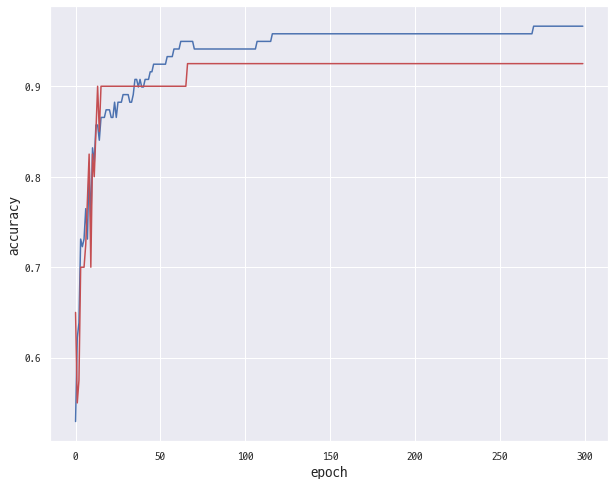

In [32]:
plt.plot(train_score, c='b')
plt.plot(test_score, c = 'r')
plt.xlabel('epoch', size = 15)
plt.ylabel('accuracy', size = 15)
plt.show() # 두 그래프가 가까이 있는 위치의 애포크 횟수(100)를 가져온다.  

In [31]:
# 조기종료 가능 : 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈추는 기능
# tol :향상된 최소값을 지정하는 매개변수로 None으로 값을 주면 자동으로 멈추지 않고, max_iter 만큼 반복된다.
sc = SGDClassifier(loss = 'log', max_iter=100, tol = None, random_state = 42)
# 서포트 벡터 머신(SVM) 알고리즘에서 사용되는 손실함수의 기본값은 hinge
sc.fit(train_scaled, y_train)   
    
# 평가
print('훈련데이터 점수 :', sc.score(train_scaled, y_train))
print('테스트데이터 점수 :', sc.score(test_scaled, y_test))

훈련데이터 점수 : 0.957983193277311
테스트데이터 점수 : 0.925
